In [1]:
import sys
import os
import importlib
import random
from itertools import combinations
import glob

import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import prettypyplot as pplt

import mdtraj as md

import ivac
import extq

In [2]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [3]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("diverging", colors)
pplt.load_cmaps()

# gating charge

In [4]:
import MDAnalysis as mda

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [5]:
topfile = "/project/dinner/scguo/ci-vsd/models/MD-clustering-center/civsd.psf"
u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.3.dcd")

In [6]:
def compute_displacement_charge(u, not_ions, ions):
    Lz = u.trajectory.dimensions[2] # length of box
    q = 0
    # protein, lipid, water
    # for atom in u.select_atoms("not segid ION"):
    for atom in not_ions:
        q += atom.charge * (atom.position[2] + 0.5 * Lz) / Lz
    # ions, use unwrapped coordinates
    # for atom in u.select_atoms("segid ION"):
    for atom in ions:
        z = atom.position[2]
        if z > 0:
            z -= Lz
        q += atom.charge * (z + 1.0 * Lz) / Lz
    return q

In [7]:
for s in u.segments:
    print(s)

<Segment A>
<Segment ION>
<Segment L11>
<Segment L12>
<Segment L13>
<Segment L14>
<Segment L21>
<Segment L22>
<Segment L23>
<Segment L24>
<Segment W1>
<Segment W10>
<Segment W11>
<Segment W12>
<Segment W13>
<Segment W15>
<Segment W16>
<Segment W17>
<Segment W18>
<Segment W2>
<Segment W20>
<Segment W4>
<Segment W5>
<Segment W6>
<Segment W7>
<Segment W8>
<Segment W9>
<Segment WD1>
<Segment WD2>
<Segment WD3>
<Segment WD4>
<Segment WU1>
<Segment WU2>
<Segment WU3>
<Segment WU4>


In [8]:
for _ in u.trajectory[:10]:
    print(u.trajectory.dimensions)
    # for atom in u.select_atoms("protein"):
    #     print(atom.charge, atom.position)

[78.451515 78.451515 88.00808  90.       90.       90.      ]
[78.08777 78.08777 88.29343 90.      90.      90.     ]
[78.05537 78.05537 88.1123  90.      90.      90.     ]
[78.15014  78.15014  88.306694 90.       90.       90.      ]
[78.25833 78.25833 88.0832  90.      90.      90.     ]
[78.042816 78.042816 88.28033  90.       90.       90.      ]
[78.61752  78.61752  87.216675 90.       90.       90.      ]
[78.68511 78.68511 87.1498  90.      90.      90.     ]
[78.50016 78.50016 87.15728 90.      90.      90.     ]
[78.61223 78.61223 87.40058 90.      90.      90.     ]


In [7]:
for a in u.select_atoms("not segid ION"):
    print(a)

<Atom 1: CAY of type CT3 of resname GLN, resid 106 and segid A>
<Atom 2: HY1 of type HA3 of resname GLN, resid 106 and segid A>
<Atom 3: HY2 of type HA3 of resname GLN, resid 106 and segid A>
<Atom 4: HY3 of type HA3 of resname GLN, resid 106 and segid A>
<Atom 5: CY of type C of resname GLN, resid 106 and segid A>
<Atom 6: OY of type O of resname GLN, resid 106 and segid A>
<Atom 7: N of type NH1 of resname GLN, resid 106 and segid A>
<Atom 8: HN of type H of resname GLN, resid 106 and segid A>
<Atom 9: CA of type CT1 of resname GLN, resid 106 and segid A>
<Atom 10: HA of type HB1 of resname GLN, resid 106 and segid A>
<Atom 11: CB of type CT2 of resname GLN, resid 106 and segid A>
<Atom 12: HB1 of type HA2 of resname GLN, resid 106 and segid A>
<Atom 13: HB2 of type HA2 of resname GLN, resid 106 and segid A>
<Atom 14: CG of type CT2 of resname GLN, resid 106 and segid A>
<Atom 15: HG1 of type HA2 of resname GLN, resid 106 and segid A>
<Atom 16: HG2 of type HA2 of resname GLN, resid 1

In [42]:
not_ions = u.select_atoms("not segid ION")
ions = u.select_atoms("segid ION")
for _ in u.trajectory:
    print(compute_displacement_charge(u, not_ions, ions))

-3.010399745473925
-2.671726117847619
-2.9458579890143732
-3.098269089281408
-3.213767815871963
-3.399735194384526
-2.7947407338206203
-3.070060995161822
-3.0817517161943835
-2.86486427338811
-3.203396478675137
-2.9730260661637926
-3.278238897134536
-3.0390236649837545
-2.95913183156382
-3.219146273389731
-3.0477078988923
-3.1285567619262764
-3.082922723545142
-2.8662614631725836
-2.8689273630303136
-3.038313187375017


KeyboardInterrupt: 

In [17]:
traj = md.load("/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.3.dcd", top=topfile)

In [21]:
traj.n_atoms

56582

In [20]:
traj.topology.select("not (resname SOD CLA)")

array([    0,     1,     2, ..., 56540, 56541, 56542])

In [22]:
traj.topology.select("(resname SOD CLA)")

array([56543, 56544, 56545, 56546, 56547, 56548, 56549, 56550, 56551,
       56552, 56553, 56554, 56555, 56556, 56557, 56558, 56559, 56560,
       56561, 56562, 56563, 56564, 56565, 56566, 56567, 56568, 56569,
       56570, 56571, 56572, 56573, 56574, 56575, 56576, 56577, 56578,
       56579, 56580, 56581])

In [40]:
traj.top.atom(0).

AttributeError: 'Atom' object has no attribute 'mass'

In [18]:
for box, frame in zip(traj.unitcell_lengths, traj.xyz):
    for atom in traj.top.select("not (resname SOD CLA)"):
        q += atom.charge * (atom.position[2] + 0.5 * Lz) / Lz
    # ions, use unwrapped coordinates
    for atom in u.select_atoms("segid ION"):
        z = atom.position[2]
        if z > 0:
            z -= Lz
        q += atom.charge * (z + 1.0 * Lz) / Lz
    return q

[[7.8451514 7.8451514 8.800808 ]
 [7.808777  7.808777  8.829343 ]
 [7.8055367 7.8055367 8.81123  ]
 ...
 [7.862289  7.862289  8.722964 ]
 [7.8479705 7.8479705 8.749267 ]
 [7.8308177 7.8308177 8.763237 ]]


## Old Anton trajectories

In [7]:
def traj_displacement_charge(topfile, trajfile, n_frame=10000):
    u = mda.Universe(topfile, trajfile)
    not_ions = u.select_atoms("not segid ION")
    ions = u.select_atoms("segid ION")
    q = np.zeros(n_frame)
    for _ in enumerate(u.trajectory[:n_frame]):
        q[i] = compute_displacement_charge(u, not_ions, ions)
    return q

In [8]:
dcds_old = []
for i in range(179):
    dcds_old.append(f"/project/dinner/scguo/anton-old/civsd_{i}.dcd")
print(len(dcds_old))

179


In [9]:
from joblib import Parallel, delayed
from multiprocessing import cpu_count
n_jobs = cpu_count()

In [10]:
displacement_charges = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(traj_displacement_charge)(topfile, dcd) for dcd in dcds_old)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. 

KeyboardInterrupt: 

In [ ]:
np.save("../../data/raw_feat/displacement_q_0-178.npy", displacement_charges)

## First frame of new anton trajectories

In [6]:
def compute_displacement_charge_single(u, not_ions, ions):
    Lz = u.dimensions[2] # length of box
    q = 0
    # protein, lipid, water
    # for atom in u.select_atoms("not segid ION"):
    for atom in not_ions:
        q += atom.charge * (atom.position[2] + 0.5 * Lz) / Lz
    # ions, use unwrapped coordinates
    # for atom in u.select_atoms("segid ION"):
    for atom in ions:
        z = atom.position[2]
        if z > 0:
            z -= Lz
        q += atom.charge * (z + 1.0 * Lz) / Lz
    return q

In [7]:
results_all = np.zeros((115))
ix = 0
for i in range(3, 119):
    print(ix)
    if i == 82:
        continue
    files = glob.glob(f"/beagle3/dinner/scguo/anton2-backup/workdir.{i}/*.dms")
    k = ""
    for f in files:
        if not "group" in f: # exclude groups.dms file
            k = f
    print(k)
    u = mda.Universe(k)
    not_ions = u.select_atoms("not name CLA SOD")
    ions = u.select_atoms("name CLA SOD")
    results_all[ix] = compute_displacement_charge_single(u, not_ions, ions)
    ix += 1

0
/beagle3/dinner/scguo/anton2-backup/workdir.3/civsd.final.dms
1
/beagle3/dinner/scguo/anton2-backup/workdir.4/smd_13_end.final.dms
2
/beagle3/dinner/scguo/anton2-backup/workdir.5/smd_12_end.final.dms
3
/beagle3/dinner/scguo/anton2-backup/workdir.6/smd_13_end.final.2.dms
4
/beagle3/dinner/scguo/anton2-backup/workdir.7/smd_11_end.final.dms
5
/beagle3/dinner/scguo/anton2-backup/workdir.8/smd_28_end.final.dms
6
/beagle3/dinner/scguo/anton2-backup/workdir.9/smd_29_end.final.dms
7
/beagle3/dinner/scguo/anton2-backup/workdir.10/smd_30_end.final.dms
8
/beagle3/dinner/scguo/anton2-backup/workdir.11/smd_31_end.final.dms
9
/beagle3/dinner/scguo/anton2-backup/workdir.12/smd_32_end.final.dms
10
/beagle3/dinner/scguo/anton2-backup/workdir.13/smd_33_end.final.dms
11
/beagle3/dinner/scguo/anton2-backup/workdir.14/smd_34_end.final.dms
12
/beagle3/dinner/scguo/anton2-backup/workdir.15/smd_35_end.final.dms
13
/beagle3/dinner/scguo/anton2-backup/workdir.16/smd_36_end.final.dms
14
/beagle3/dinner/scguo/a

In [30]:
print(results_all)

[ -3.0101147   -5.47709389  -7.00600348  -5.47709389  -6.81683378
  -3.25336939   0.82236149   0.87079729  -4.89383881  -5.13586986
 -10.83692091  -0.69617044  -3.41447028  -0.695658    -3.5800299
  -3.44350251  -4.54468241  -0.69617044  -0.69617044  -7.00600348
  -2.82320463  -4.15186257  -4.75907508  -5.10785218  -5.52690858
  -4.86463624  -3.0101147   -5.47709389  -7.00600348  -5.47709389
  -6.81683378  -3.25336939   0.82236149   0.87079729  -4.89383881
  -5.13586986 -10.83692091  -0.69617044  -3.41447028  -0.695658
  -3.5800299   -3.44350251  -4.54468241  -0.69617044  -0.69617044
  -7.00600348  -2.82320463  -4.15186257  -4.75907508  -5.10785218
  -5.52690858  -4.86463624  -5.1817771   -4.11887039  -4.86811649
  -4.14270791  -4.51993841  -5.20033106  -4.82436884  -4.08129938
  -5.47709389  -3.5800299   -3.41447028  -5.47709389  -5.1817771
  -4.11887039  -4.86811649  -4.14270791  -4.51993841  -5.20033106
  -4.82436884  -4.08129938  -4.96714123  -3.94673178  -3.92228801
  -3.25665691 

In [8]:
displacement_1 = np.load("../../data/raw_feat/displacement_q_anton2.npy")

In [9]:
displacement_2 = np.zeros((115, 10001))
displacement_2[:, 1:] = displacement_1
displacement_2[:, 0] = results_all

In [10]:
np.save("../../data/raw_feat/displacement_q_anton2.npy", displacement_2)

## Fix lengths of 2nd half of old trajectories

In [11]:
displacement_3 = np.load("../../data/raw_feat/displacement_q_179-end.npy")
print(displacement_3.shape)

(57, 100000)


In [13]:
for t in displacement_3:
    print(t)

[-5.0425078  -4.81775312 -5.00666725 ... -4.07837608 -4.4724931
 -3.85690103]
[-4.17590689 -4.05117177 -3.93840207 ... -3.60753378 -3.42021846
 -3.61685065]
[-4.35818019 -3.99088442 -3.92488957 ... -3.51708246 -3.77888577
 -3.39617159]
[-3.79214775 -3.49323203 -3.35877466 ... -3.12764827 -3.07988863
 -2.99073311]
[-3.2917273  -3.11544499 -3.45404724 ... -2.9637212  -2.74296278
 -2.91396594]
[-2.17731765 -2.21076062 -1.95523996 ... -2.95114468 -2.58233646
 -2.82840749]
[-3.33455716 -3.44087621 -3.46893347 ...  0.          0.
  0.        ]
[-3.16880176 -3.12545394 -3.46363697 ...  0.          0.
  0.        ]
[-3.91903342 -4.07878009 -4.06015709 ...  0.          0.
  0.        ]
[-3.27529797 -3.39954772 -3.20308671 ...  0.          0.
  0.        ]
[-3.51071197 -3.52246581 -3.73575081 ...  0.          0.
  0.        ]
[-3.79762785 -3.82565966 -4.10194125 ...  0.          0.
  0.        ]
[-3.18750417 -3.40871063 -2.99404444 ...  0.          0.
  0.        ]
[-3.63948609 -3.53412506 -3.40

In [14]:
new_displacement_3 = []
for i in range(6):
    new_displacement_3.append(displacement_3[i])
for i in range(6, len(displacement_3)):
    new_displacement_3.append(displacement_3[i, :10000])

In [18]:
print([len(t) for t in new_displacement_3])

[100000, 100000, 100000, 100000, 100000, 100000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


In [19]:
print(np.concatenate(new_displacement_3).shape)

(1110000,)


In [20]:
np.save("../../data/raw_feat/displacement_q_179-end.npy", new_displacement_3)

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


# plot against CVs

In [12]:
displacement_0 = np.load("../../data/raw_feat/displacement_q_0-178.npy")

In [13]:
displacement_0.shape

(179, 10000)

In [14]:
DATA_DIR = "/project/dinner/scguo/ci-vsd/data"
# S4 translocation/rotation data
cv_trajs = list(
    np.load(f"{DATA_DIR}/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)
cv_trajs.extend(np.load(f"{DATA_DIR}/raw_feat/cv_dist_spin_anton2.npy"))
cv_arr = np.concatenate(cv_trajs)
# salt bridge distances for states
sb_trajs = list(np.load(f"{DATA_DIR}/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
sb_trajs.extend(np.load(f"{DATA_DIR}/raw_feat/feat2_raw_anton2.npy"))
sb_arr = np.concatenate(sb_trajs)
sb_models = np.load(f"{DATA_DIR}/models_centroids_feat2.npy")
# committors
lag = 500
qp_du = np.load(f"{DATA_DIR}/feat2_dist_du_anton2/qp_downup_3.npy", allow_pickle=True)[8] # 50 ns lag time
# weights
weights = np.load(f"{DATA_DIR}/feat2_dist_du_anton2/weights_3_feat5ivac.npy", allow_pickle=True)[0] # 0.1 ns lag time

In [16]:
# bin against S4 CVs
dist_trajs = [t[:, 0] for t in cv_trajs]
rot_trajs = [t[:, 1] for t in cv_trajs]
xmin, xmax, ymin, ymax = -9.5, 8.5, -130, 85
xe = np.linspace(xmin, xmax, 100)
ye = np.linspace(ymin, ymax, 100)
q_binned = extq.projection.average2d(dist_trajs[:179], rot_trajs[:179], displacement_0, weights[:179], xe, ye)
# q_binned_2 = extq.projection.average2d(dist_trajs[237:], rot_trajs[237:], displacement_2, weights[237:], xe, ye)

/project/dinner/scguo/extq/src/extq/projection.py:140: RuntimeWarning: invalid value encountered in true_divide
  return numer / denom


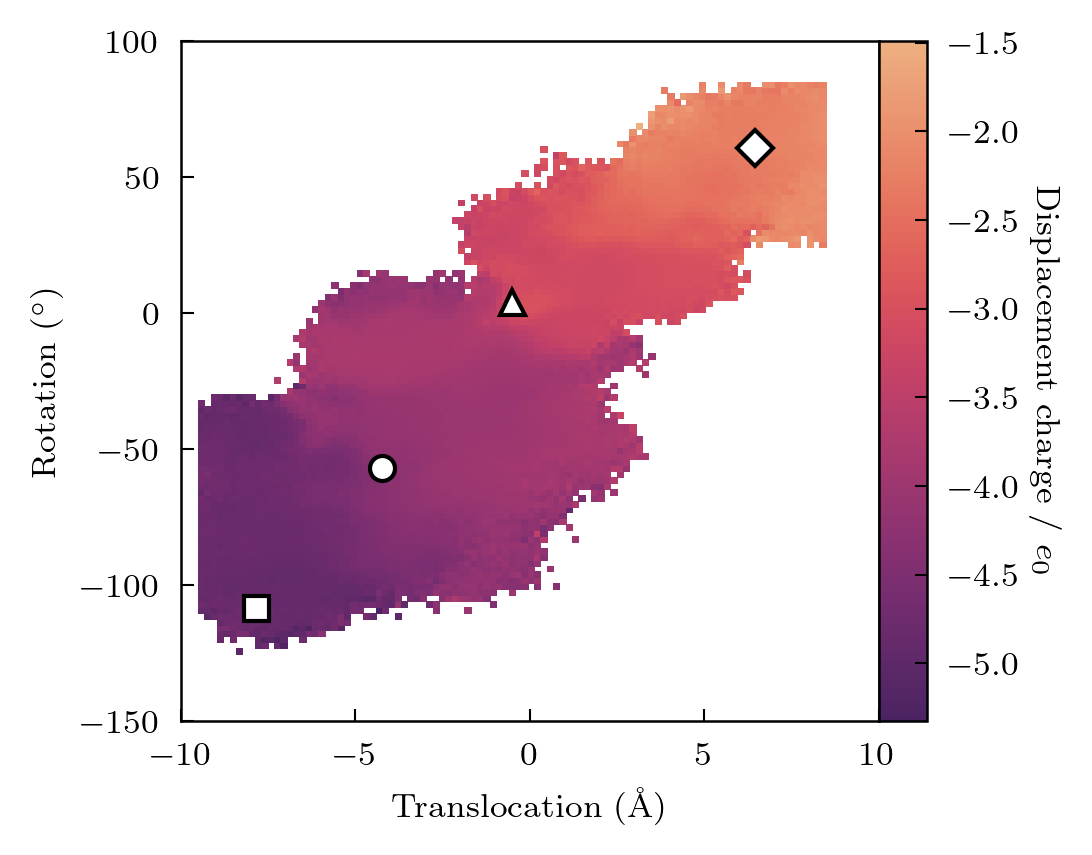

In [17]:
f = plt.figure(figsize=(3., 3.), dpi=300)
ax = plt.gca()
pc = ax.pcolor(xe, ye, q_binned.T,  cmap='flare_r')
cb = pplt.colorbar(pc)
cb.set_label("Displacement charge / $e_0$", rotation=-90, labelpad=10)
plotting.format_cvs(ax, ms=6)

In [18]:
sb_names = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_names.append(f"{r} C$_\\alpha$-{n} C$_\\alpha$")
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        if n.startswith("D"):
            sb_names.append(f"{r} C$_\\zeta$-{n} C$_\\gamma$")
        else:
            sb_names.append(f"{r} C$_\\zeta$-{n} C$_\\delta$")

/project/dinner/scguo/extq/src/extq/projection.py:140: RuntimeWarning: invalid value encountered in true_divide
  return numer / denom
/scratch/local/jobs/4110203/ipykernel_955167/709703273.py:19: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f3cb49d3e20> has a label of '_blank' which cannot be automatically added to the legend.
  f.legend(bbox_to_anchor=(0.5, 1.07), loc='center', ncol=3, labels=["_blank", 'Down–', 'Down', 'Up'])


[(3.0, 16.0), (3.0, 16.0)]

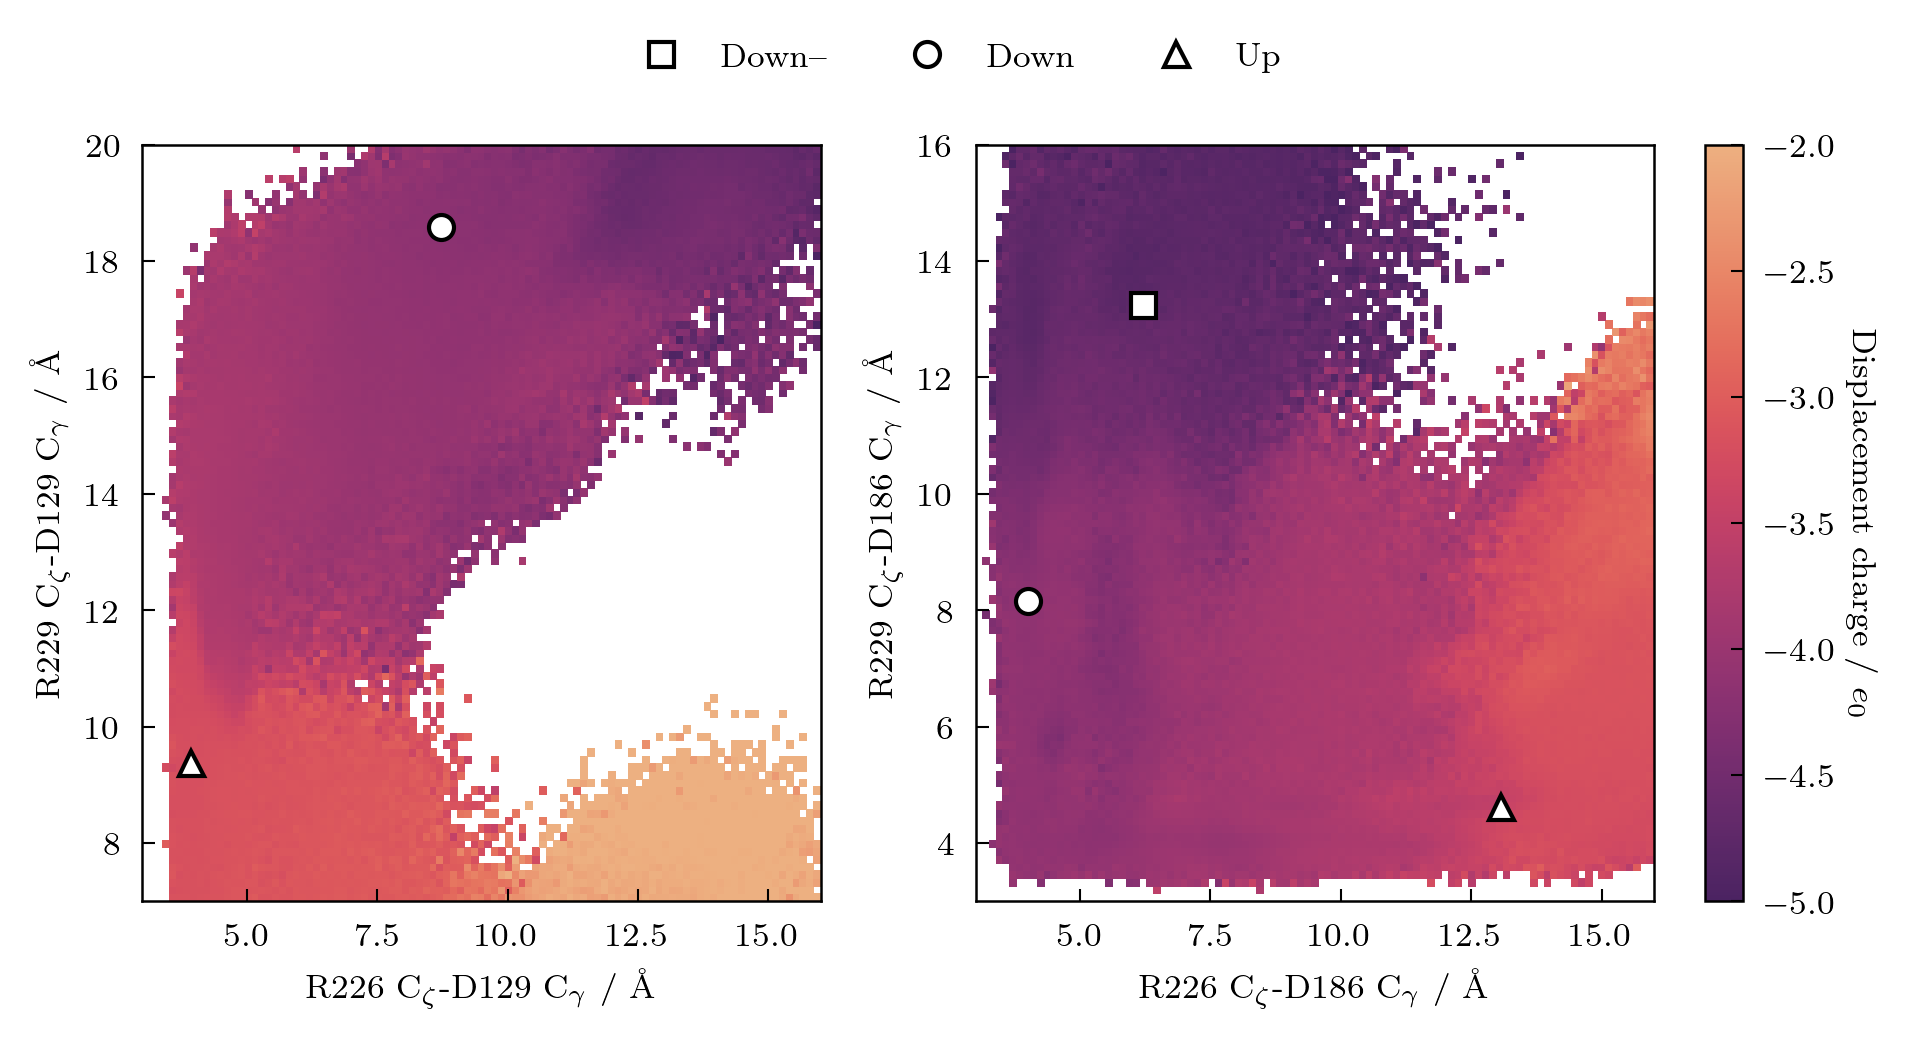

In [19]:
f, axes = plt.subplots(1, 2, figsize=(6.25, 3), dpi=300, constrained_layout=True)

range0 = [[3, 16], [7, 20]]
range1 = [[3, 16], [3, 16]]
nbin = 100
for ((sb1, sb2), ax, r) in zip(((42, 48), (47, 53)), axes, (range0, range1)):
    sb1_trajs = [t[:, sb1] * 10 for t in sb_trajs]
    sb2_trajs = [t[:, sb2] * 10 for t in sb_trajs]
    xlim = np.linspace(*r[0], nbin)
    ylim = np.linspace(*r[1], nbin)
    q_dens = extq.projection.average2d(sb1_trajs[:179], sb2_trajs[:179], displacement_0, weights[:179], xlim, ylim)
    h = ax.pcolor(xlim, ylim, q_dens.T, cmap='flare_r', vmin=-5, vmax=-2)
    ax.set(
        xlabel=f"{sb_names[sb1]} / Å",
        ylabel=f"{sb_names[sb2]} / Å",
    )
    plotting.plot_models(ax, sb_models[:, [sb1, sb2]] * 10, ms=6)

f.legend(bbox_to_anchor=(0.5, 1.07), loc='center', ncol=3, labels=["_blank", 'Down–', 'Down', 'Up'])
cb = plt.colorbar(h, ax=axes[-1])
cb.solids.set(alpha=1)
cb.set_label("Displacement charge / $e_0$", rotation=-90, labelpad=10)
axes[0].set(xlim=range0[0], ylim=range0[1])
axes[1].set(xlim=range1[0], ylim=range1[1])

## Average over committor

In [24]:
# states to do stopping
dist = cv_arr[:1_790_000, 0]
rot = cv_arr[:1_790_000, 1]
sb1 = sb_arr[:1_790_000, 42]  # R226-D129
sb2 = sb_arr[:1_790_000, 47]  # R226-D186
sb3 = sb_arr[:1_790_000, 48]  # R229-D129
sb4 = sb_arr[:1_790_000, 53]  # R229-D186
sb5 = sb_arr[:1_790_000, 59]  # R232-D186


# ellipse centered at down centroid with radii 1.1 nm and 8 deg (1 sigma in each direction)
# take points where R2-D186 < 0.5 (lower salt bridges), R2-D129 > 0.6 (upper salt bridge)
dist_ax_down = (dist + 4.240) / 1.1
rot_ax_down = (rot + 56.95) / 8
down_ids = ((dist_ax_down ** 2 + rot_ax_down ** 2) < 1) & (sb1 > 0.6) & (sb2 < 0.5)

# ellipse centered at up centroid with radii 0.84 nm and 7.6 deg (2 sigma in each direction)
# take points where R2-D129 (up) < 0.5, R3-D129 < 1.1, R3/R4-D186 salt bridges < 0.75/0.6 nm
up_ids = (
    ((((dist + 0.506) / 0.84) ** 2 + ((rot - 3.94) / 7.6) ** 2) < 1)
    & (sb1 < 0.5)
    & (sb3 < 1.1)
    & (sb4 < 0.75)
    & (sb5 < 0.6)
)

## average in state

In [35]:
def mean_std(trajs, ids):
    arr = np.concatenate(trajs)[ids]
    return np.mean(arr), np.std(arr)

down_avg, down_std = mean_std(displacement_0, down_ids)
up_avg, up_std = mean_std(displacement_0, up_ids)
print(down_avg, down_std)
print(up_avg, up_std)

-4.193058991400028 0.23482123609722746
-3.309451303631079 0.20593700828674258


In [25]:
traj_inds = util.split_indices(cv_trajs)
in_domain = np.split(~(down_ids | up_ids), traj_inds)

In [27]:
from extq.stop import forward_stop

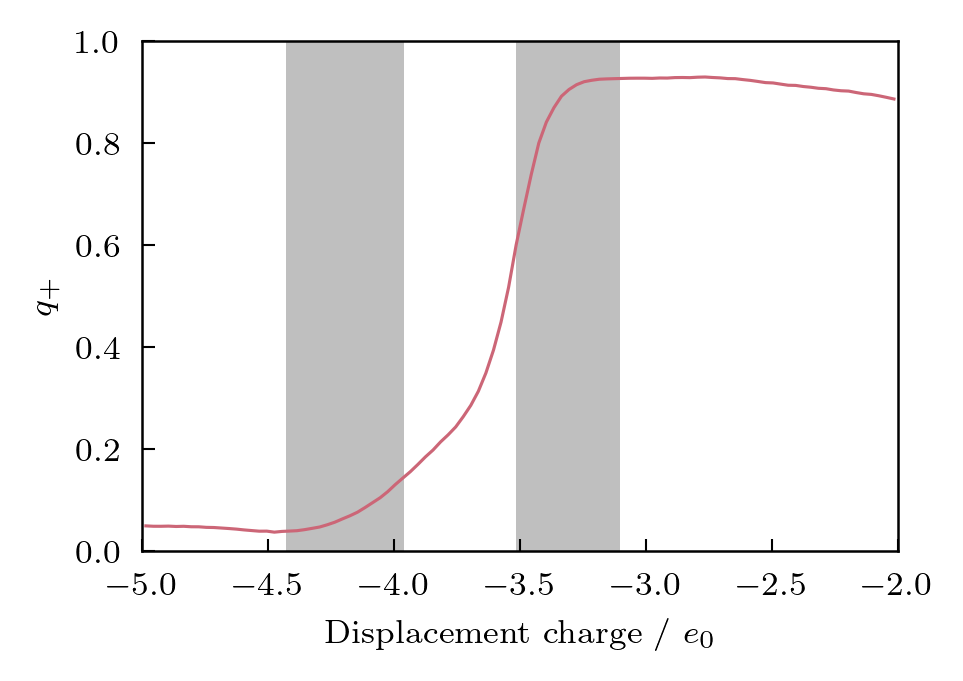

In [39]:
f = plt.figure(figsize=(3.25, 2.25), dpi=300)
ax = plt.gca()

lo, hi = -5, -2
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

lag = 500
qp_delay = []
w_delay = [w[:-lag] for w in weights]
for d, t in zip(in_domain, qp_du):
    # find first stopping time
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(t[stop_times])
    
q_dens = extq.projection.average1d(displacement_0[:, lag:], qp_delay[:179], w_delay[:179], qe)
ax.plot(qc, q_dens)
ax.set_ylabel("$q_+$")
ax.set_xlabel("Displacement charge / $e_0$")
ax.set_xlim([lo, hi])
ax.set_ylim([0, 1])
ax.axvspan(down_avg - down_std, down_avg + down_std, color='gray', alpha=0.5, zorder=0, ec=None)
ax.axvspan(up_avg - up_std, up_avg + up_std, color='gray', alpha=0.5, zorder=0, ec=None)

(0.0, 1.0)

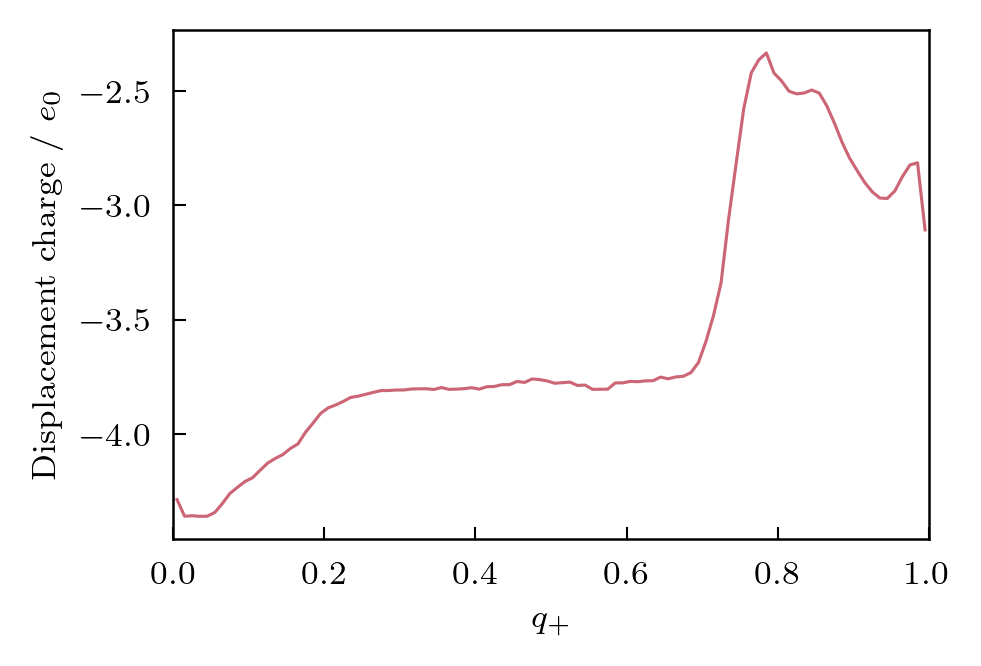

In [33]:
f = plt.figure(figsize=(3.25, 2.25), dpi=300)
ax = plt.gca()

lo, hi = 0.0, 1.0
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

q_dens = extq.projection.average1d(qp_du[:179], displacement_0, weights[:179], qe)
ax.plot(qc, q_dens)
ax.set_xlabel("$q_+$")
ax.set_ylabel("Displacement charge / $e_0$")
ax.set_xlim([lo, hi])

In [26]:
def bin_inds(q, qstep=0.05, low=0, hi=1):
    q_arr = np.concatenate(q)
    nsteps = round((hi - low) / qstep)
    all_inds = []
    steps = np.linspace(low, hi - qstep, nsteps)
    for i, s in enumerate(steps):
        q_inds = ((q_arr >= s) & (q_arr <= s + qstep)).nonzero()[0]
        all_inds.append(q_inds)
    return steps, all_inds

In [29]:
steps, q_inds = bin_inds(qp_du[:179], qstep=0.1, low=0.15, hi=0.85)

In [30]:
steplabels = []
for i, s in enumerate(steps):
    if i % 2 == 0:
        steplabels.append(f"{s+0.05:.1f}")
    else:
        steplabels.append("")

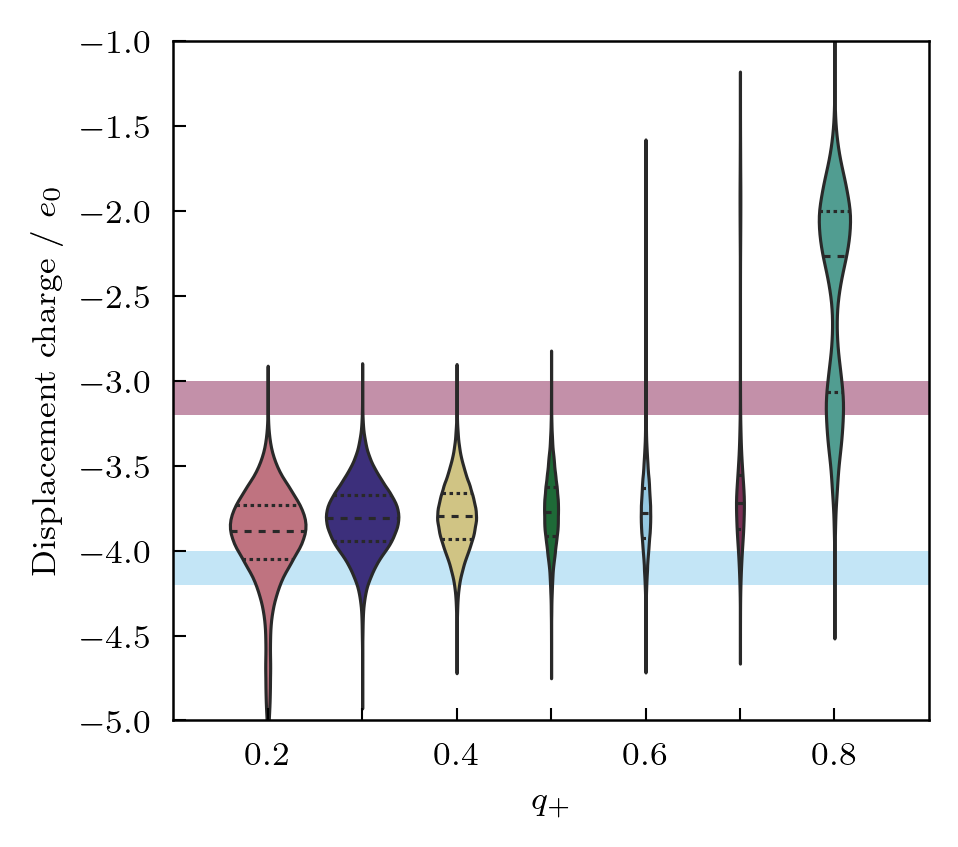

In [39]:
f, ax = plt.subplots(figsize=(3.25, 3), dpi=300)

sns.violinplot(ax=ax, data=[np.concatenate(displacement_0)[inds] for inds in q_inds], scale='count', bw=0.1, inner="quartile")
ax.set_xticklabels(steplabels)
ax.set_ylabel("Displacement charge / $e_0$")
ax.set_xlim([-1, 7])
ax.set_ylim([-5, -1])
ax.set_xlabel("$q_+$")
ax.fill_between(np.arange(-1, 8), -4.2, -4.0, color='C4', alpha=0.5, zorder=0, ec=None)
ax.fill_between(np.arange(-1, 8), -3.2, -3.0, color='C5', alpha=0.5, zorder=0, ec=None)

# Fix bug in calculation

In [28]:
len(md.load_frame("/project/dinner/scguo/anton-old/civsd_0.dcd", 0, top=topfile))

1

In [35]:
displacement_1 = np.load("../../data/raw_feat/displacement_q_anton2.npy")

In [36]:
displacement_1.shape

(115, 10000)

In [41]:
# bin against S4 CVs
dist_trajs = [t[:10000, 0] for t in cv_trajs]
rot_trajs = [t[:10000, 1] for t in cv_trajs]
w_trajs = [t[:10000] for t in weights]
xmin, xmax, ymin, ymax = -9.5, 8.5, -130, 85
xe = np.linspace(xmin, xmax, 100)
ye = np.linspace(ymin, ymax, 100)
q_binned_2 = extq.projection.average2d(dist_trajs[237:], rot_trajs[237:], displacement_1, w_trajs[237:], xe, ye)

/project/dinner/scguo/extq/src/extq/projection.py:140: RuntimeWarning: invalid value encountered in true_divide
  return numer / denom


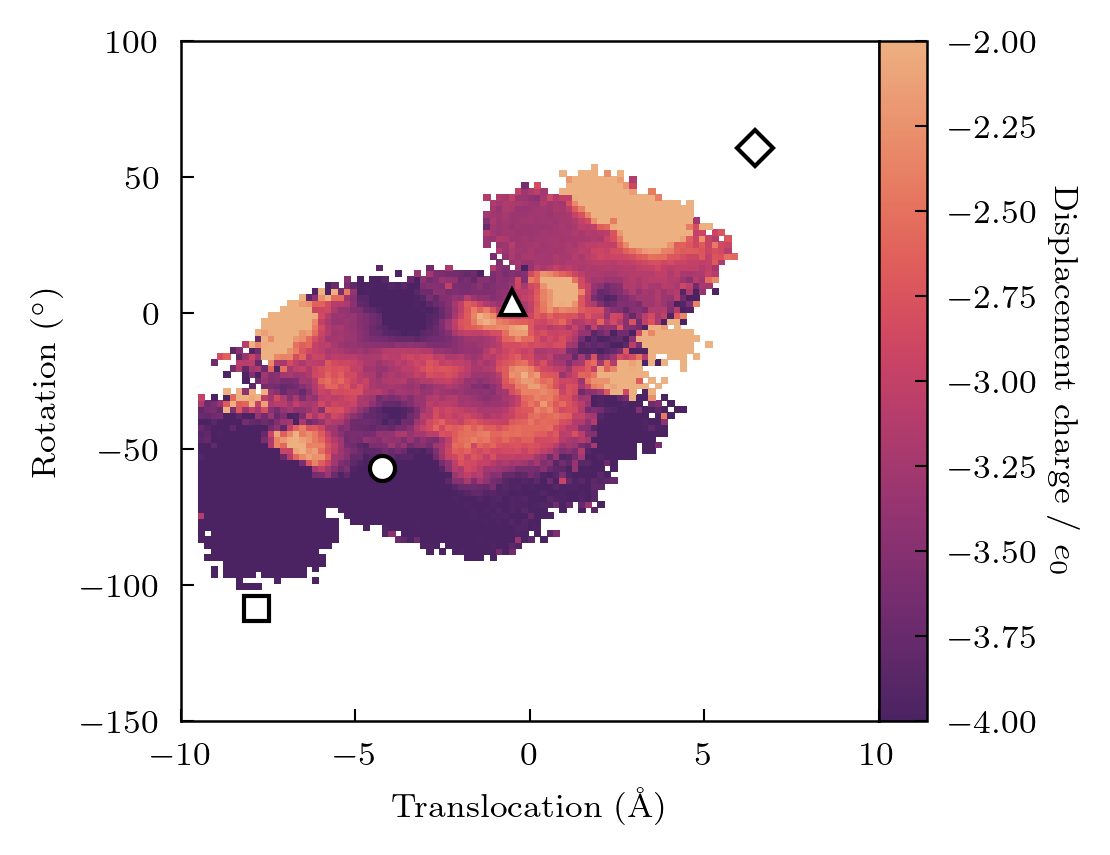

In [43]:
f = plt.figure(figsize=(3., 3.), dpi=300)
ax = plt.gca()
pc = ax.pcolor(xe, ye, q_binned_2.T,  cmap='flare_r', vmin=-4, vmax=-2)
cb = pplt.colorbar(pc)
cb.set_label("Displacement charge / $e_0$", rotation=-90, labelpad=10)
plotting.format_cvs(ax, ms=6)

In [12]:
# bin against S4 CVs
dist_trajs = [t[:10000, 0] for t in cv_trajs]
rot_trajs = [t[:10000, 1] for t in cv_trajs]
w_trajs = [t[:10000] for t in weights]
xmin, xmax, ymin, ymax = -9.5, 8.5, -130, 85
xe = np.linspace(xmin, xmax, 100)
ye = np.linspace(ymin, ymax, 100)
q_binned_2 = extq.projection.average2d(dist_trajs[237:], rot_trajs[237:], displacement_1, w_trajs[237:], xe, ye)

/project/dinner/scguo/extq/src/extq/projection.py:140: RuntimeWarning: invalid value encountered in true_divide
  return numer / denom


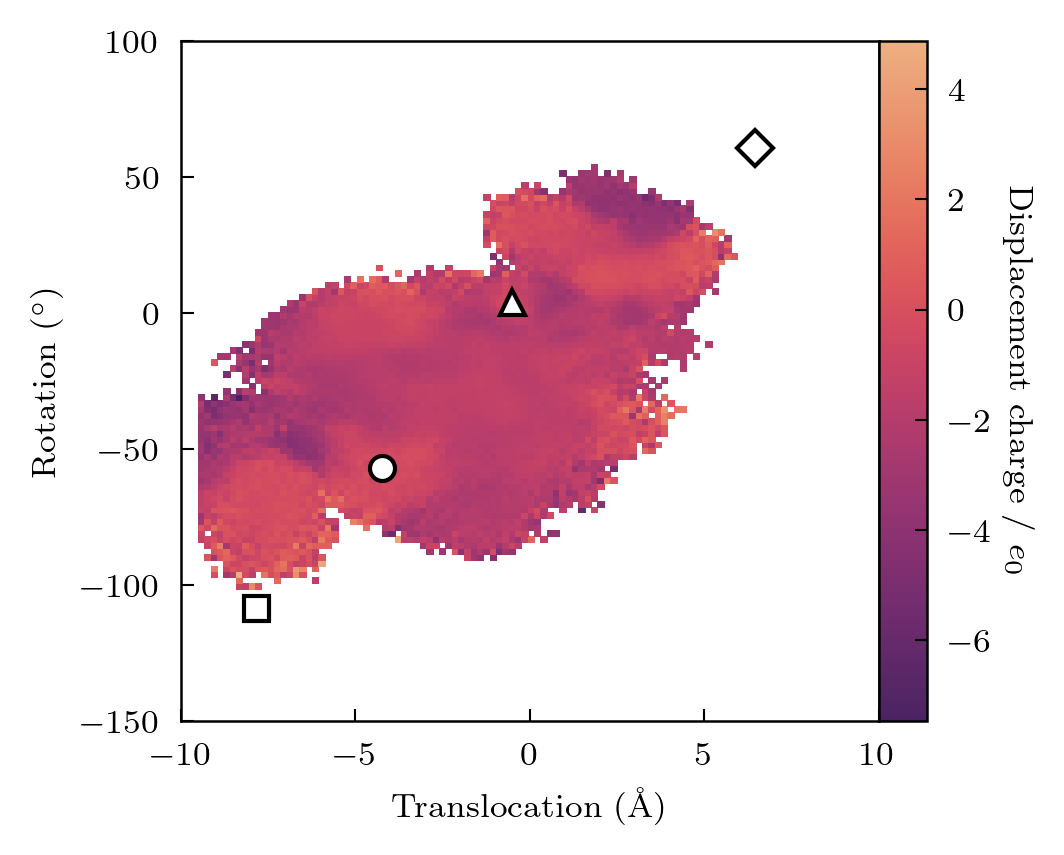

In [14]:
f = plt.figure(figsize=(3., 3.), dpi=300)
ax = plt.gca()
pc = ax.pcolor(xe, ye, q_binned_2.T,  cmap='flare_r')
cb = pplt.colorbar(pc)
cb.set_label("Displacement charge / $e_0$", rotation=-90, labelpad=10)
plotting.format_cvs(ax, ms=6)

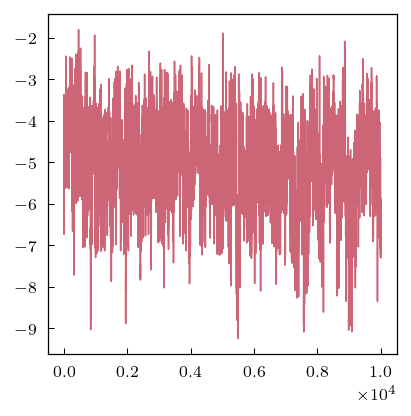

In [45]:
plt.plot(displacement_1[1])

In [151]:
displacement_2 = np.load("../../data/raw_feat/displacement_q_0-178.npy")

In [152]:
displacement_2.shape

(179, 10000)

In [153]:
np.unravel_index(np.argmax(displacement_2), displacement_2.shape)

(44, 9853)

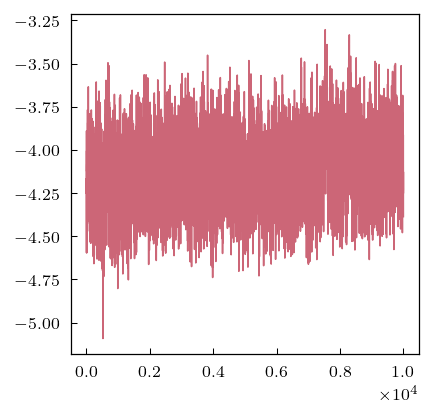

In [154]:
plt.plot(displacement_2[0])

In [155]:
np.unravel_index(np.argmin(displacement_2), displacement_2.shape)

(108, 5589)

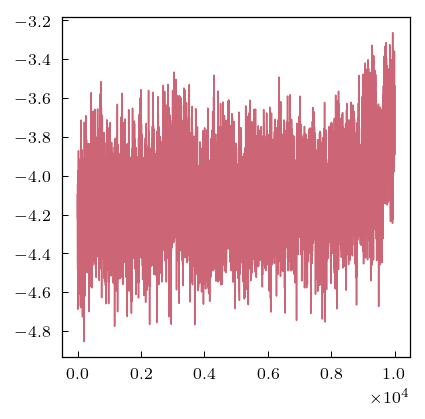

In [156]:
plt.plot(displacement_2[103])

In [68]:
np.unravel_index(np.argmin(displacement_0), displacement_0.shape)

(108, 5589)

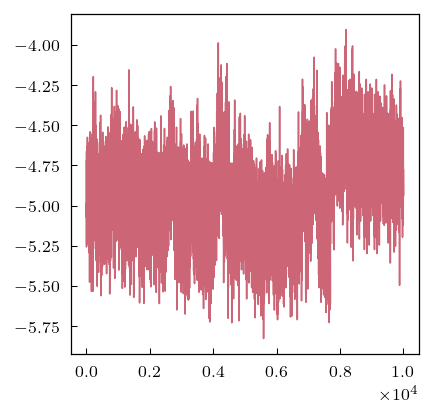

In [70]:
plt.plot(displacement_0[108])

In [161]:
# try with noPBC
def compute_displacement_charge_nopbc(u, not_ions, ions):
    Lz = u.dimensions[2] # length of box
    q = 0
    # protein, lipid, water
    for atom in not_ions:
        q += atom.charge * (atom.position[2] / Lz)
    # ions, use unwrapped coordinates
    for atom in ions:
        z = atom.position[2]
        # if z > Lz:
        #     z -= Lz
        q += atom.charge * (z / Lz)
    return q

In [9]:
# new no. 62
u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.65.dcd")

In [162]:
new_q = np.zeros(100)
not_ions = u.select_atoms("not name CLA SOD")
ions = u.select_atoms("name CLA SOD")
for i, _ in enumerate(u.trajectory[:100]):
    q = compute_displacement_charge_nopbc(u, not_ions, ions)
    new_q[i] = q

KeyboardInterrupt: 

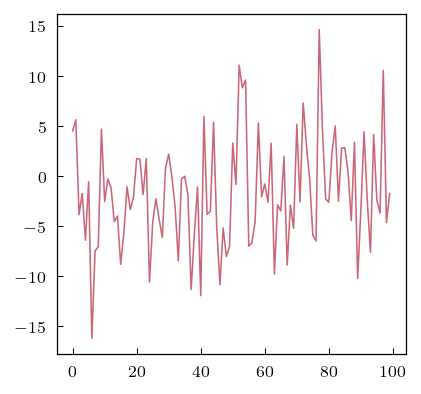

In [163]:
plt.plot(new_q)

In [75]:
# u = mda.Universe("/beagle3/dinner/scguo/anton2-backup/workdir.13/smd_33_end.final.dms")
u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.65.dcd")

In [61]:
print(u.segments)

<SegmentGroup [<Segment A>, <Segment ION>, <Segment L11>, ..., <Segment WU2>, <Segment WU3>, <Segment WU4>]>


In [64]:
print(u.dimensions)

[77.968605 77.968605 88.81582  90.       90.       90.      ]


In [63]:
for a in u.select_atoms("name CLA SOD"):
    print(a, a.position[2])

<Atom 56544: SOD of type SOD of resname SOD, resid 1 and segid ION> 14.290884
<Atom 56545: SOD of type SOD of resname SOD, resid 2 and segid ION> -21.499979
<Atom 56546: SOD of type SOD of resname SOD, resid 3 and segid ION> -24.265177
<Atom 56547: SOD of type SOD of resname SOD, resid 4 and segid ION> 1.7307932
<Atom 56548: SOD of type SOD of resname SOD, resid 5 and segid ION> 20.439386
<Atom 56549: SOD of type SOD of resname SOD, resid 6 and segid ION> -5.5900154
<Atom 56550: SOD of type SOD of resname SOD, resid 7 and segid ION> -19.868574
<Atom 56551: SOD of type SOD of resname SOD, resid 8 and segid ION> 28.86974
<Atom 56552: SOD of type SOD of resname SOD, resid 9 and segid ION> 12.127426
<Atom 56553: SOD of type SOD of resname SOD, resid 10 and segid ION> -24.022392
<Atom 56554: SOD of type SOD of resname SOD, resid 11 and segid ION> -23.726076
<Atom 56555: SOD of type SOD of resname SOD, resid 12 and segid ION> -14.4600725
<Atom 56556: SOD of type SOD of resname SOD, resid 13 

In [118]:
np.max(u.atoms.positions, axis=0)

array([46.73649, 45.60818, 46.24888], dtype=float32)

## test with imaging

In [10]:
from MDAnalysis import transformations

In [11]:
# move water and ions back to other side
u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.65.dcd")
no_prot = u.select_atoms("protein")
# no_prot = u.atoms

trans = transformations.wrap(no_prot, compound='residues')
ions = u.select_atoms("name CLA SOD")
ion_unwrap = transformations.unwrap(ions)
# center = transformations.center_in_box(no_prot, point=(0, 0, 0), wrap=True)
u.trajectory.add_transformations(trans, ion_unwrap)

In [212]:
with mda.coordinates.XTC.XTCWriter(
    "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.65.wrap.xtc", len(u.atoms)) as w:
    for ts in u.trajectory[:100]:
        w.write(u.atoms)

In [15]:
print(np.max(u.select_atoms("not name CLA SOD").positions, axis=0), np.min(u.select_atoms("not name CLA SOD").positions, axis=0))
print(np.max(u.select_atoms("name CLA SOD").positions, axis=0), np.min(u.select_atoms("name CLA SOD").positions, axis=0))

[79.696724 80.48184  75.76661 ] [-46.06694  -51.776474 -48.49736 ]
[36.936714 38.52458  29.941832] [-36.44273 -35.12592 -27.67086]


In [12]:
# try with noPBC
def compute_displacement_charge_test(u, not_ions, ions):
    Lz = u.dimensions[2] # length of box
    q = 0
    # protein, lipid, water
    for atom in not_ions:
        q += atom.charge * (atom.position[2] + 0.5 * Lz) / Lz
    # ions, use unwrapped coordinates
    for atom in ions:
        z = atom.position[2]
        # if z > -0.5 * Lz:
        #     z -= Lz
        q += atom.charge * (z + 1.0 * Lz) / Lz
    return q

In [13]:
new_q = np.zeros(100)
not_ions = u.select_atoms("not name CLA SOD")
ions = u.select_atoms("name CLA SOD")
for i, _ in enumerate(u.trajectory[:100]):
    # q = compute_displacement_charge_test(u, not_ions, ions)
    q = compute_displacement_charge(u, not_ions, ions)
    new_q[i] = q

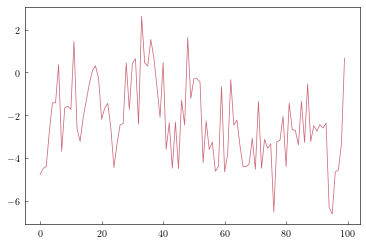

In [14]:
plt.plot(new_q)

In [93]:
for ts in u.trajectory[:2]:
    for a in u.select_atoms("name CLA SOD"):
        print(a, a.position[2])

<Atom 56544: SOD of type SOD of resname SOD, resid 1 and segid ION> 14.290884
<Atom 56545: SOD of type SOD of resname SOD, resid 2 and segid ION> -21.499979
<Atom 56546: SOD of type SOD of resname SOD, resid 3 and segid ION> -24.265177
<Atom 56547: SOD of type SOD of resname SOD, resid 4 and segid ION> 1.7307932
<Atom 56548: SOD of type SOD of resname SOD, resid 5 and segid ION> 20.439386
<Atom 56549: SOD of type SOD of resname SOD, resid 6 and segid ION> -5.5900154
<Atom 56550: SOD of type SOD of resname SOD, resid 7 and segid ION> -19.868574
<Atom 56551: SOD of type SOD of resname SOD, resid 8 and segid ION> 28.86974
<Atom 56552: SOD of type SOD of resname SOD, resid 9 and segid ION> 12.127426
<Atom 56553: SOD of type SOD of resname SOD, resid 10 and segid ION> -24.022392
<Atom 56554: SOD of type SOD of resname SOD, resid 11 and segid ION> -23.726076
<Atom 56555: SOD of type SOD of resname SOD, resid 12 and segid ION> -14.4600725
<Atom 56556: SOD of type SOD of resname SOD, resid 13 

## old (correct)

In [ ]:
u = mda.Universe(topfile, "/project/dinner/scguo/anton-old/civsd_0.dcd")

In [57]:
print(u.dimensions[2])

91.07816


In [109]:
for a in u.select_atoms("name CLA SOD"):
    for ts in u.trajectory[:2]:
        print(a, a.position[2])
    

<Atom 56544: SOD of type SOD of resname SOD, resid 1 and segid ION> 25.97142
<Atom 56544: SOD of type SOD of resname SOD, resid 1 and segid ION> 20.599508
<Atom 56545: SOD of type SOD of resname SOD, resid 2 and segid ION> 16.92278
<Atom 56545: SOD of type SOD of resname SOD, resid 2 and segid ION> 20.255548
<Atom 56546: SOD of type SOD of resname SOD, resid 3 and segid ION> -19.86503
<Atom 56546: SOD of type SOD of resname SOD, resid 3 and segid ION> -25.521742
<Atom 56547: SOD of type SOD of resname SOD, resid 4 and segid ION> 16.68491
<Atom 56547: SOD of type SOD of resname SOD, resid 4 and segid ION> 17.901533
<Atom 56548: SOD of type SOD of resname SOD, resid 5 and segid ION> 16.584
<Atom 56548: SOD of type SOD of resname SOD, resid 5 and segid ION> 13.95641
<Atom 56549: SOD of type SOD of resname SOD, resid 6 and segid ION> -31.63504
<Atom 56549: SOD of type SOD of resname SOD, resid 6 and segid ION> -30.91291
<Atom 56550: SOD of type SOD of resname SOD, resid 7 and segid ION> 44

In [34]:
q = 0
for atom in u.select_atoms("name SOD CLA"):
    Lz = u.dimensions[2]
    z = atom.position[2]
    print(z)
    if z > 0:
        z -= Lz
    q += atom.charge * (z + 1.0 * Lz) / Lz
    print(q)

15.035461
0.1639091174409149
35.97397
0.556079418149614
42.032726
1.0142992808045914
34.417034
1.3894966580298234
22.5564
1.6353953495451374
42.286144
2.0963778487714313
44.50979
2.5816014109940064
46.714466
3.090859270963697
38.13939
3.5066359086031063
38.799156
3.929604999360824
62.18622
4.60752820129121
50.724243
5.160498655235748
19.986032
5.378376413724123
75.48423
6.2012679217688795
44.88588
6.690591440933382
17.716248
6.883725154589461
21.224041
7.115099044796116
53.05268
7.693452968848728
58.297047
8.32897835760025
26.316227
8.615864808130416
30.846632
8.279590157342033
32.88823
7.921059048944728
67.00053
7.190652655423882
58.483997
6.553089223363608
27.667686
6.251469875525824
53.604424
5.667101128750293
42.22251
5.206812324439794
61.5505
4.535819417918397
56.67431
3.9179843099609037
49.136612
3.3823214214869686
39.191586
2.955074261244649
46.05959
2.4529555412296644
48.983997
1.918956381099128
49.394695
1.3804799964602057
54.801445
0.7830619172095642
51.739513
0.2190234924746

In [ ]:
def compute_displacement_charge_single(u, not_ions, ions):
    Lz = u.dimensions[2] # length of box
    q = 0
    # protein, lipid, water
    # for atom in u.select_atoms("not segid ION"):
    for atom in not_ions:
        q += atom.charge * (atom.position[2] + 0.5 * Lz) / Lz
    # ions, use unwrapped coordinates
    # for atom in u.select_atoms("segid ION"):
    for atom in ions:
        z = atom.position[2]
        if z > 0:
            z -= Lz
        q += atom.charge * (z + 1.0 * Lz) / Lz
    return q